<a href="https://colab.research.google.com/github/KrishChothani/AI_ML/blob/main/ML_PRACT_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
def calculate_entropy(target):

    class_counts = target.value_counts()
    probabilities = class_counts / len(target)
    entropy = -np.sum(probabilities * np.log2(probabilities + 1e-9))  # Add a small value to avoid log(0)
    return entropy

In [ ]:
def calculate_information_gain(data, feature_column, target_column):

    total_entropy = calculate_entropy(data[target_column])
    weighted_entropy = 0
    unique_values = data[feature_column].unique()

    for value in unique_values:
        subset = data[data[feature_column] == value]
        subset_entropy = calculate_entropy(subset[target_column])
        weight = len(subset) / len(data)
        weighted_entropy += weight * subset_entropy

    information_gain = total_entropy - weighted_entropy
    return information_gain

In [ ]:
def build_tree(data, features, target_column):

    if len(data[target_column].unique()) == 1:
        return {"class": data[target_column].iloc[0]}

    if not features:
        majority_class = data[target_column].mode()[0]
        return {"class": majority_class}

    information_gains = {}
    for feature in features:
        information_gains[feature] = calculate_information_gain(data, feature, target_column)

    best_feature = max(information_gains, key=information_gains.get)

    tree = {best_feature: {}}

    remaining_features = [f for f in features if f != best_feature]
    for value in data[best_feature].unique():
        subset_data = data[data[best_feature] == value].copy()
        tree[best_feature][value] = build_tree(subset_data, remaining_features, target_column)

    return tree

In [ ]:
def predict(tree, instance, default_class):
    """
    Traverses the trained decision tree and makes a prediction for a single data instance.

    Args:
        tree: A dictionary representing the trained decision tree.
        instance: A pandas Series or dictionary representing a new data point.
        default_class: The class to return for unseen values (e.g., the overall majority class).

    Returns:
        The predicted class for the instance.
    """
    # Check if the current node is a leaf node.
    if "class" in tree:
        return tree["class"]

    # Get the splitting feature from the current node.
    splitting_feature = list(tree.keys())[0]

    # Get the value of the splitting feature from the instance.
    instance_value = instance.get(splitting_feature)

    # Check if the instance value exists as a branch in the tree.
    if instance_value in tree[splitting_feature]:
        # Recursively call predict with the corresponding subtree.
        return predict(tree[splitting_feature][instance_value], instance, default_class)
    else:
        # Handle unseen values by returning the default class.
        return default_class

In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
feature_columns = X_train.columns.tolist()
target_column_name = y_train.name
decision_tree = build_tree(train_data, feature_columns, target_column_name)

In [ ]:
# Create a list to store the predictions for the test data.
predictions = []

# Get the default class (majority class from training data)
target_column_name = y_train.name
default_class = train_data[target_column_name].mode()[0]

# Iterate through each row of the X_test DataFrame and make predictions.
for index, row in X_test.iterrows():
    instance_dict = row.to_dict()
    prediction = predict(decision_tree, instance_dict, default_class)
    predictions.append(prediction)

# Convert the predictions list into a pandas Series.
predictions_series = pd.Series(predictions)

# Calculate the accuracy of the model by comparing predicted values with actual values.
# Ensure that both Series have the same index for accurate comparison
predictions_series.index = y_test.index
correct_predictions = (predictions_series == y_test).sum()
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions

# Print the calculated accuracy.
print(f"Accuracy on the test data: {accuracy}")

Accuracy on the test data: 0.8444444444444444


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
for col in df.columns:
    if col != "species":  # Avoid encoding the target column
        df[col] = LabelEncoder().fit_transform(df[col])


x = df.drop("species", axis=1)
y = df["species"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [4]:
model = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=5)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [5]:
y_pred = model.predict(x_test)
print("ID3 Accuracy : ", accuracy_score(y_test, y_pred))

ID3 Accuracy :  0.9777777777777777


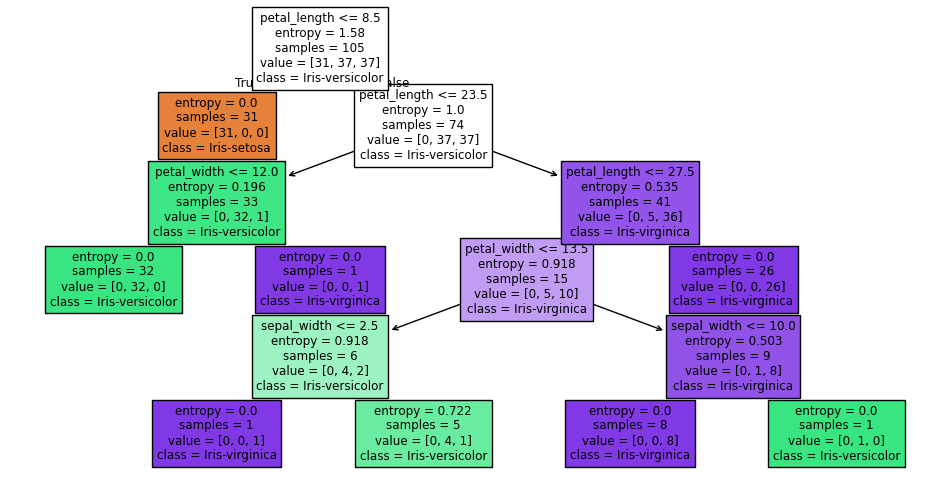

In [7]:
plt.figure(figsize=(12,6))
plot_tree(model, feature_names=x.columns, class_names=model.classes_, filled=True)
plt.show()

In [8]:
cart = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3)
cart.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [9]:
y_pred = cart.predict(x_test)
print("CART Accuracy : ", accuracy_score(y_test, y_pred))

CART Accuracy :  1.0


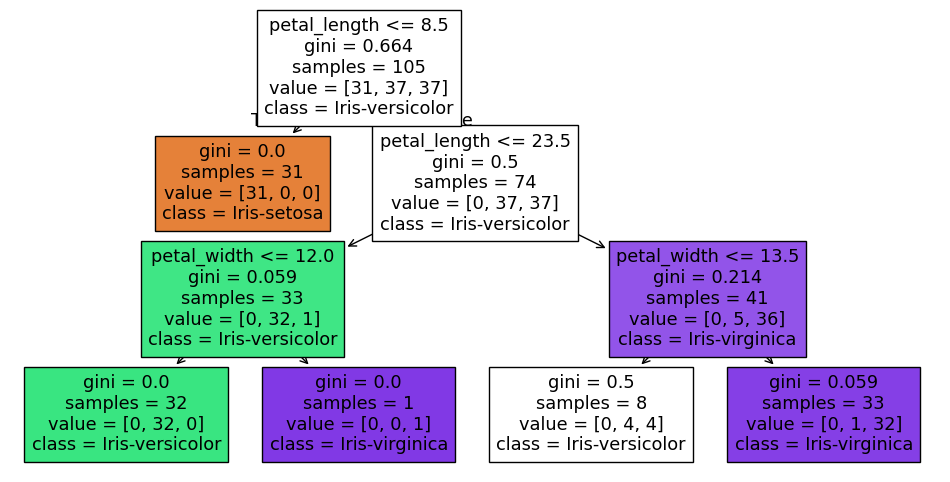

In [12]:
plt.figure(figsize=(12,6))
plot_tree(cart, feature_names=x.columns, class_names=cart.classes_, filled=True)
plt.show()

In [14]:
print(f"ID3 (C4.5) Accuracy: {accuracy_score(y_test, model.predict(x_test))}")
print(f"CART Accuracy: {accuracy_score(y_test, cart.predict(x_test))}")

ID3 (C4.5) Accuracy: 0.9777777777777777
CART Accuracy: 1.0
